## Exploratory Data Analysis

### Import Libaries

In [2]:
# Import Libraries

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
# import chart_studio.plotly as py
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
%matplotlib inline

### Load Data

In [40]:
# Run the file Data_Preprocessing.ipynb which cleaned the data. Pre-processed data are saved in the data file

housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col = 0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col = 0)
# combined data set:
ames_df = pd.read_csv('data/final_df.csv', index_col = 0)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1, 'Ames Dataframe NA Values')

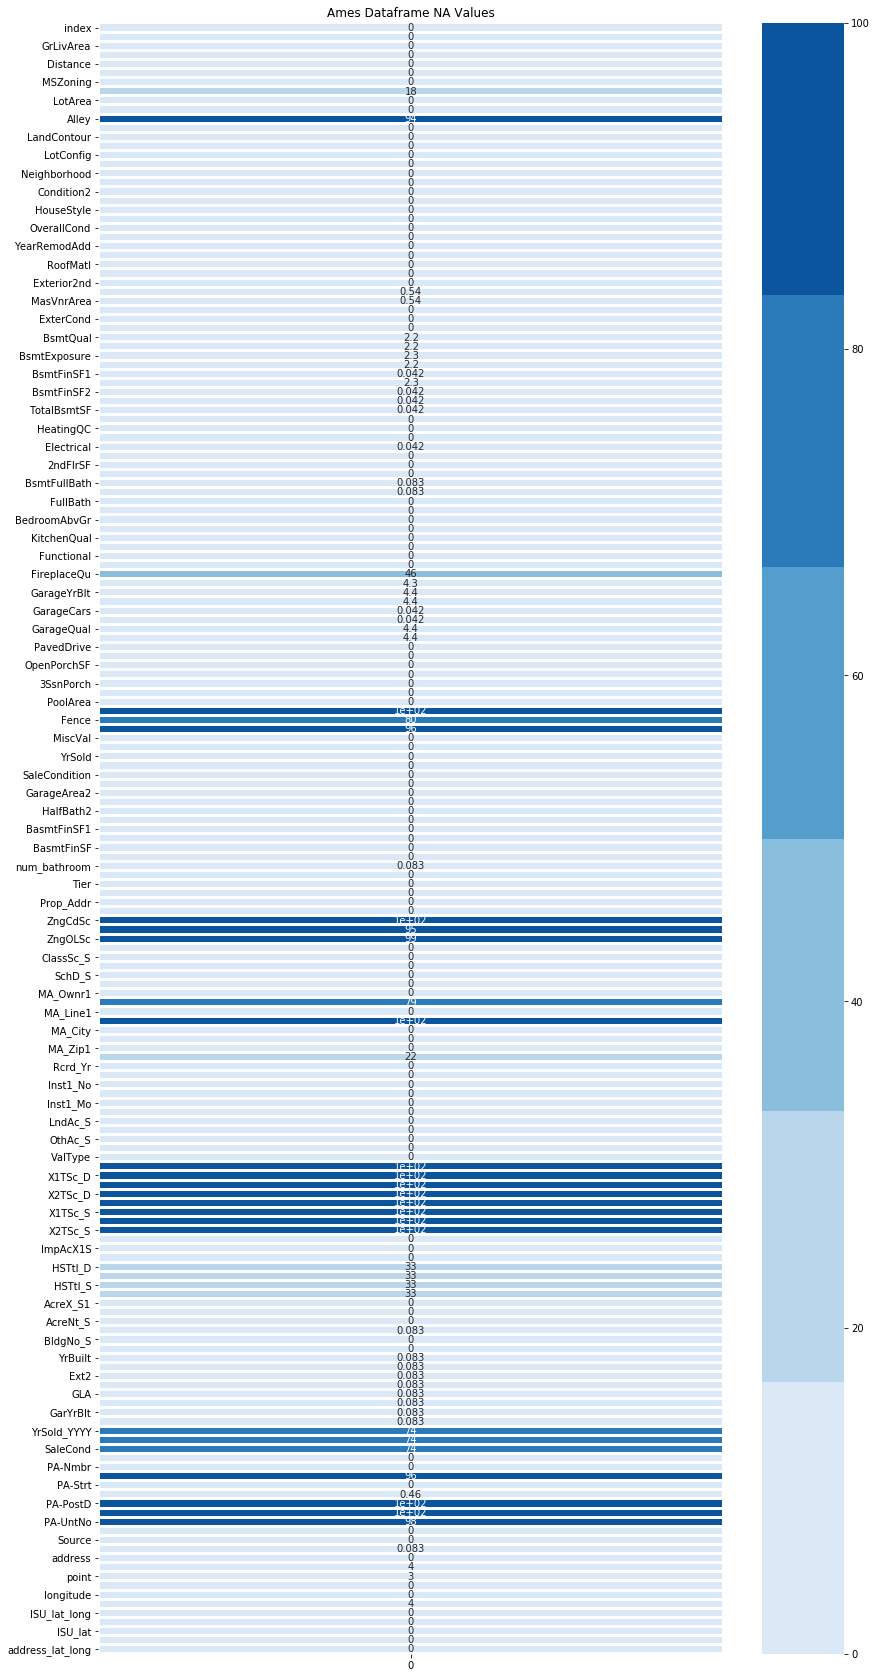

In [41]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,30))

sns.heatmap(pd.DataFrame(ames_df.isnull().sum()/ames_df.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Ames Dataframe NA Values")

### Target Variable

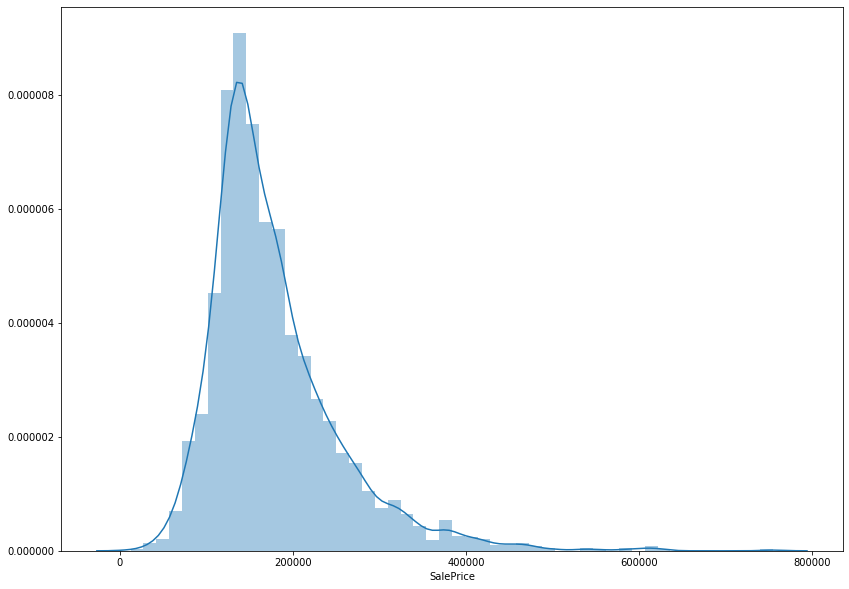

In [3]:
# SalePrice Histogram
plt.figure(figsize = (14,10))
sns.distplot(housing['SalePrice']);

<Figure size 1008x720 with 0 Axes>

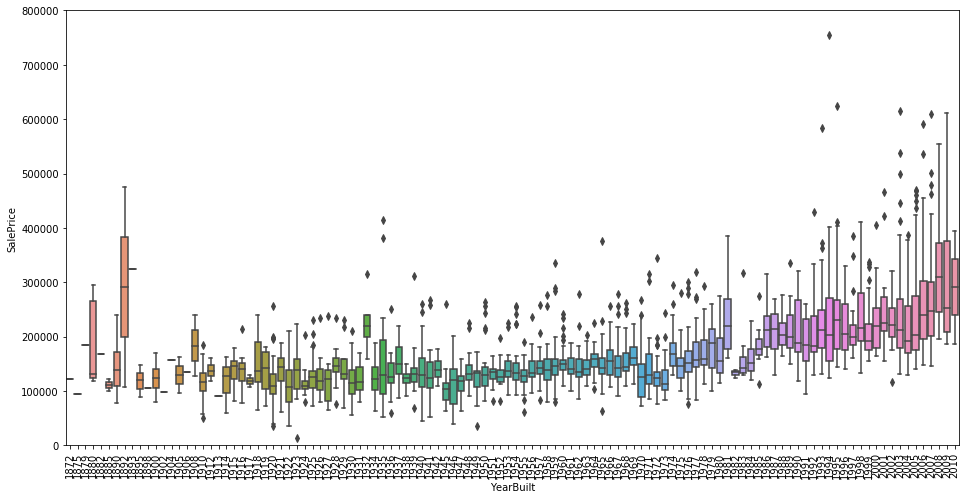

In [4]:
var = 'YearBuilt'
plt.figure(figsize = (14,10))
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Daniel

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x432 with 0 Axes>

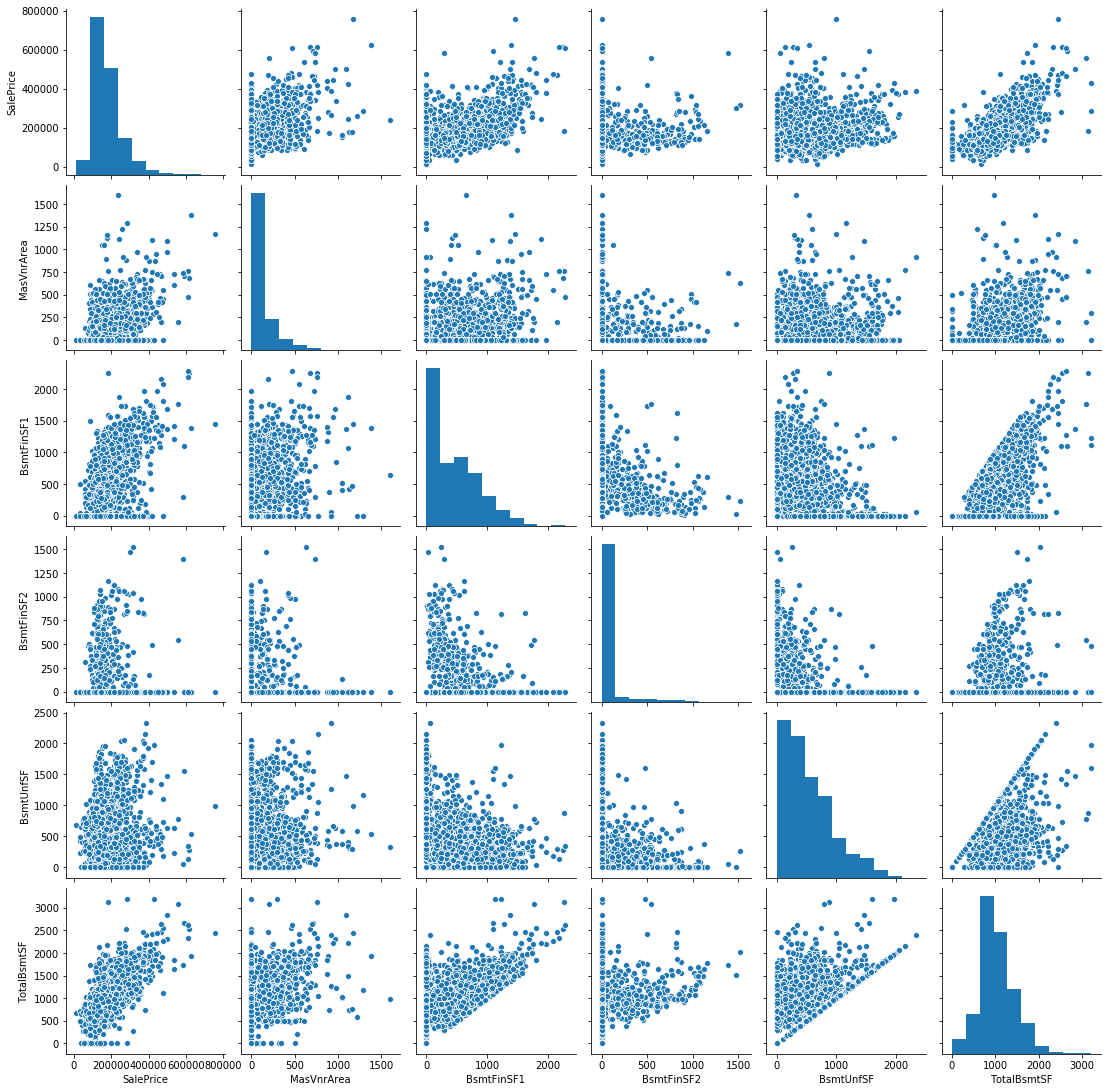

In [5]:
plt.figure(figsize = (14,6))
cols1 = ['SalePrice', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
sns.pairplot(housing[cols1], size = 2.5)
plt.show()

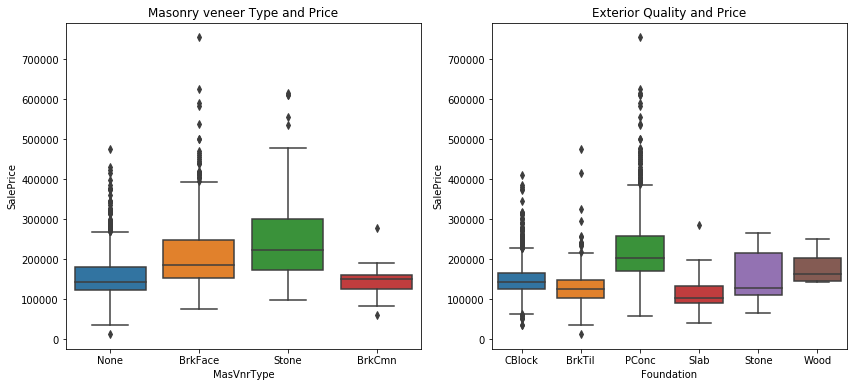

In [6]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title('Masonry veneer Type and Price')
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)

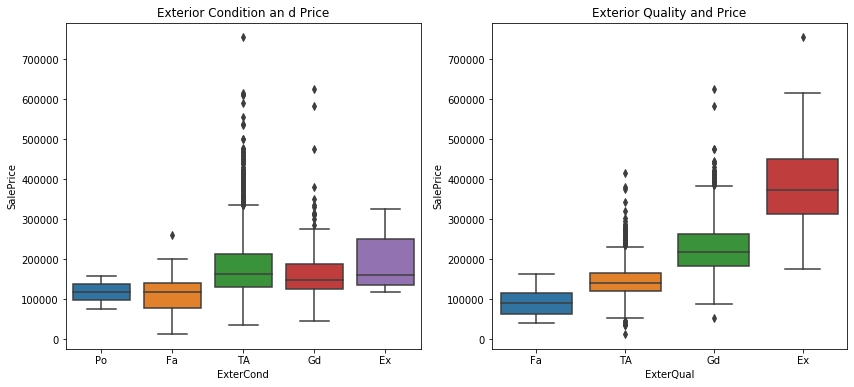

In [7]:
# Exterior Condition / Quality and Pirce
plt.figure(figsize = (14,6))
plt.subplot(1,2,1).set_title("Exterior Condition an d Price")
sns.boxplot(x = 'ExterCond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(1,2,2).set_title("Exterior Quality and Price")
sns.boxplot(x = 'ExterQual', y = 'SalePrice', order=["Fa","TA","Gd", "Ex"], data = housing)

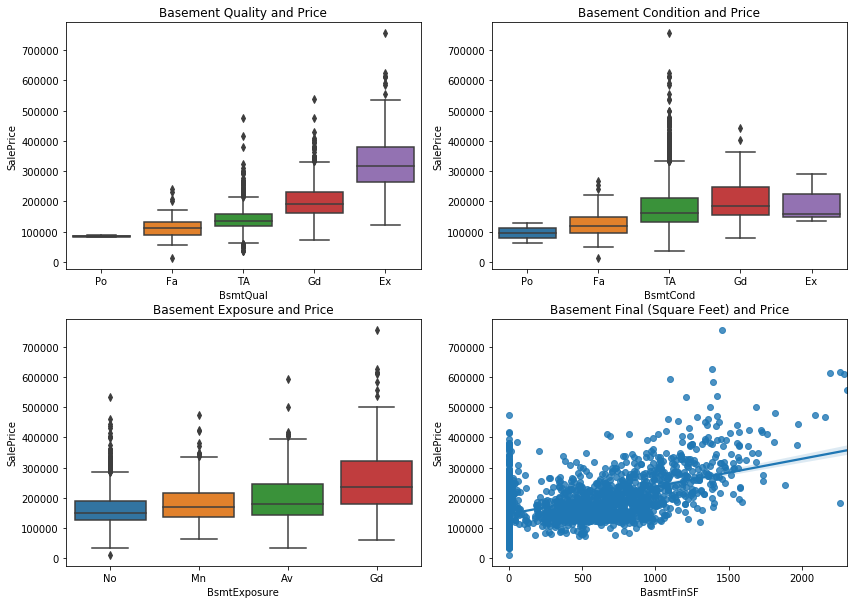

In [8]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Basement Quality and Price")
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Basement Condition and Price")
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,3).set_title("Basement Exposure and Price")
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', order=["No","Mn","Av","Gd"], data = housing)
plt.subplot(2,2,4).set_title("Basement Final (Square Feet) and Price")
sns.regplot(x = 'BasmtFinSF', y = 'SalePrice', data = housing)

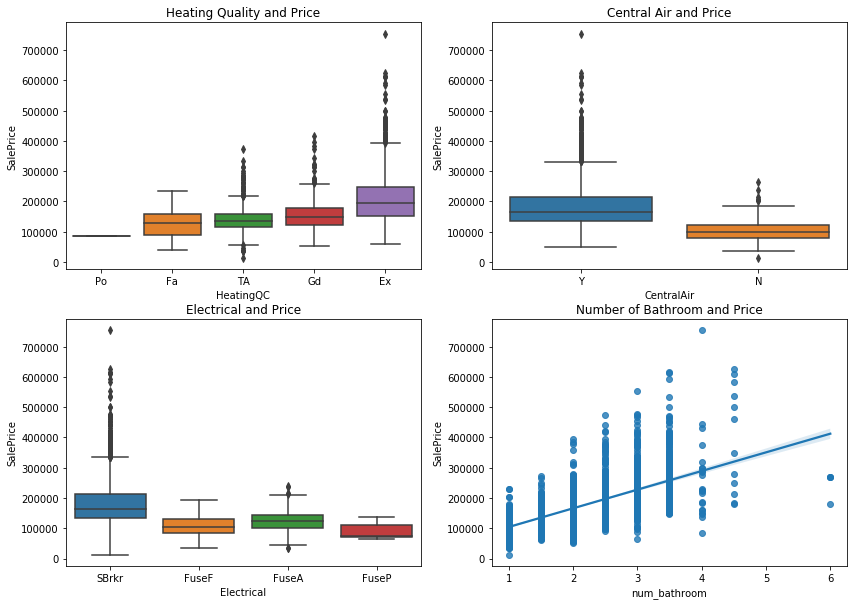

In [10]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("Heating Quality and Price")
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', order=["Po","Fa","TA","Gd", "Ex"], data = housing)
plt.subplot(2,2,2).set_title("Central Air and Price")
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.subplot(2,2,3).set_title("Electrical and Price")
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.subplot(2,2,4).set_title("Number of Bathroom and Price")
sns.regplot(x = 'num_bathroom', y = 'SalePrice', data = housing)

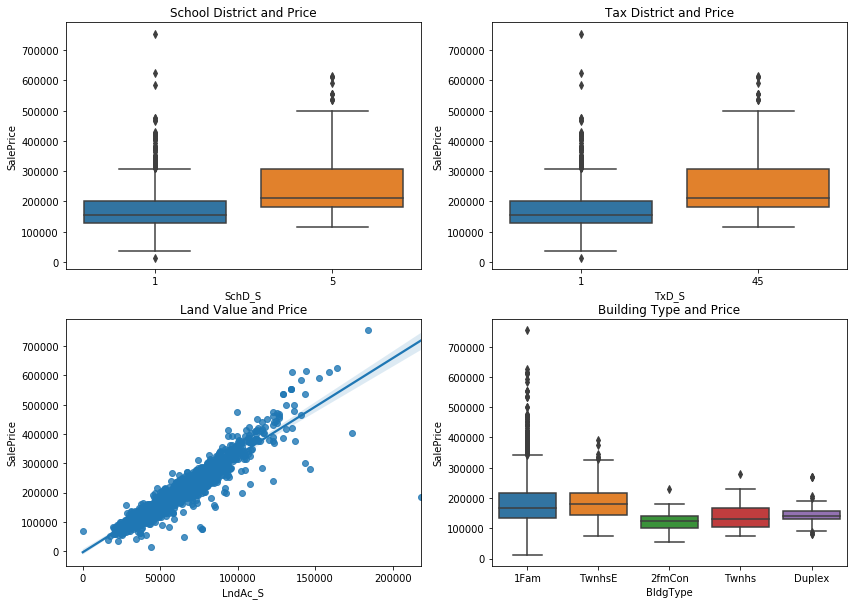

In [36]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1).set_title("School District and Price")
sns.boxplot(x = 'SchD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,2).set_title("Tax District and Price")
sns.boxplot(x = 'TxD_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,3).set_title("Land Value and Price")
sns.regplot(x = 'LndAc_S', y = 'SalePrice', data = ames_df)
plt.subplot(2,2,4).set_title("Building Type and Price")
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = ames_df)

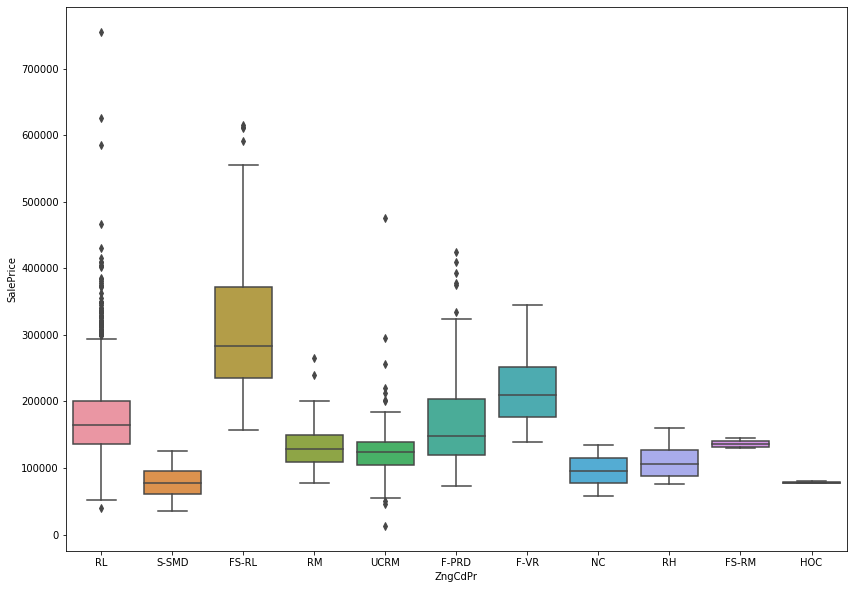

In [39]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'ZngCdPr', y = 'SalePrice', data = ames_df)

<Figure size 1008x720 with 0 Axes>

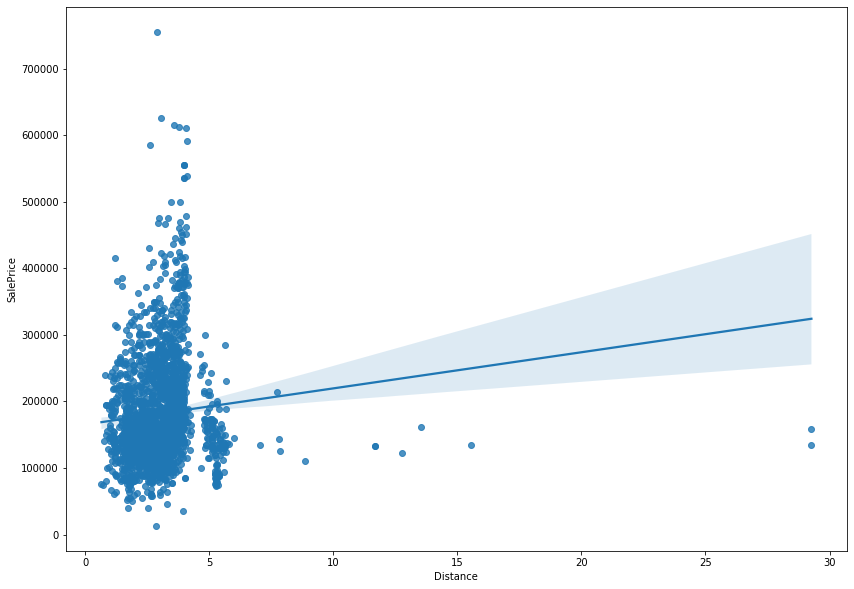

In [42]:
plt.figure(figsize = (14,10))
# Distance VS Sale Price
plt.figure(figsize = (14,10))
sns.regplot(x = 'Distance', y = 'SalePrice', data = ames_df)

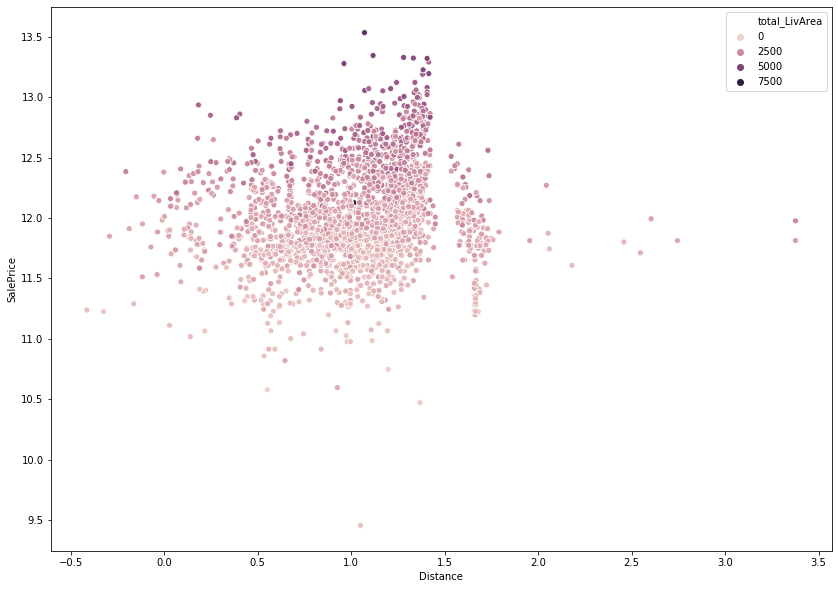

In [43]:
# Distance VS Sale Price
plt.figure(figsize = (14,10))
log_distance = np.log(ames_df['Distance'])
log_SalePrice= np.log(ames_df['SalePrice'])
sns.scatterplot(x = log_distance, y = log_SalePrice , hue = 'total_LivArea', data = ames_df)

### Danny

In [40]:
housing3 = pd.concat([housing[housing.columns[53:]],housing['SalePrice']],axis=1)
housing3.columns

Index(['KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [86]:
correlation = housing3.corr()['SalePrice']
# corr_matrix['SalePrice']
np.abs(correlation).sort_values()

YrSold           0.001376
MoSold           0.012591
MiscVal          0.018877
PoolArea         0.030844
3SsnPorch        0.031260
KitchenAbvGr     0.113977
ScreenPorch      0.121463
EnclosedPorch    0.123235
OpenPorchSF      0.306540
WoodDeckSF       0.333232
Fireplaces       0.488184
TotRmsAbvGrd     0.490219
GarageYrBlt      0.520763
GarageArea       0.634992
GarageCars       0.638801
SalePrice        1.000000
Name: SalePrice, dtype: float64

- GarageCars, GarageArea, GarageYrBlt, TotRmsAbvGrd, Fireplaces, OpenPorchSF, and WoodDeckSF are more correlated with Price

In [41]:
housing_features = housing[housing.columns[53:]]
housing_features = housing_features.rename(columns= {"3SsnPorch":"X3SsnPorch"})
housing_featuresClass = housing_features[['KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
                                         'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]
housing_featuresQuan = housing_features[['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',\
                                        'WoodDeckSF','OpenPorchSF','EnclosedPorch','X3SsnPorch','ScreenPorch','PoolArea',\
                                         'MiscVal','MoSold','YrSold']]

# housing_features.columns
# housing_featuresClass.columns
# housing_featuresQuan.columns

In [42]:
for feature1 in housing_featuresClass.columns:
    print(housing3[feature1].value_counts(), housing_featuresClass[feature1].isnull().value_counts())
    print('*'*30)

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64 False    2580
Name: KitchenQual, dtype: int64
******************************
Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64 False    2580
Name: Functional, dtype: int64
******************************
Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64 False    1339
True     1241
Name: FireplaceQu, dtype: int64
******************************
Attchd     1527
Detchd      716
BuiltIn     153
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64 False    2453
True      127
Name: GarageType, dtype: int64
******************************
Unf    1112
RFn     718
Fin     621
Name: GarageFinish, dtype: int64 False    2451
True      129
Name: GarageFinish, dtype: int64
******************************
TA    2312
Fa     110
Gd      22
Po       4
Ex       3
Name: GarageQual, dtype: int64 F

In [43]:
housing_featuresQuan.columns

Index(['KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [44]:
for feature2 in housing_featuresQuan.columns:
    print(housing_featuresQuan[feature2].isnull().value_counts())
    print('*'*30)

False    2580
Name: KitchenAbvGr, dtype: int64
******************************
False    2580
Name: TotRmsAbvGrd, dtype: int64
******************************
False    2580
Name: Fireplaces, dtype: int64
******************************
False    2451
True      129
Name: GarageYrBlt, dtype: int64
******************************
False    2579
True        1
Name: GarageCars, dtype: int64
******************************
False    2579
True        1
Name: GarageArea, dtype: int64
******************************
False    2580
Name: WoodDeckSF, dtype: int64
******************************
False    2580
Name: OpenPorchSF, dtype: int64
******************************
False    2580
Name: EnclosedPorch, dtype: int64
******************************
False    2580
Name: X3SsnPorch, dtype: int64
******************************
False    2580
Name: ScreenPorch, dtype: int64
******************************
False    2580
Name: PoolArea, dtype: int64
******************************
False    2580
Name: MiscVal, dtype: in

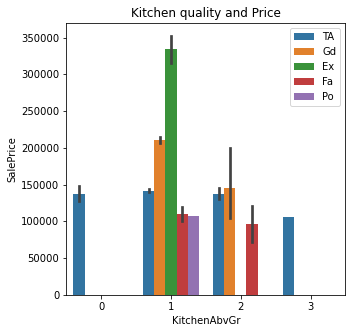

In [78]:
# Kitchen Quality vs. Price
plt.figure(figsize=(5,5))
plt.title('Kitchen quality and Price')
sns.barplot(x = 'KitchenAbvGr', y = 'SalePrice', data = housing3, hue = 'KitchenQual').legend(loc='upper right')


- Higher kitchen quality could increase house price
- Price has no significant difference in number of kitchen with same quality.

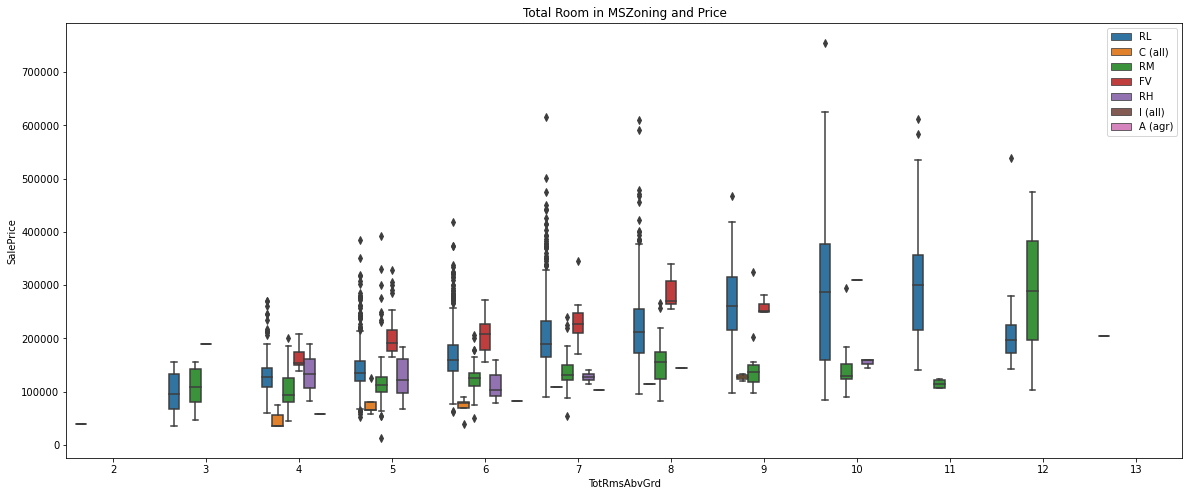

In [47]:
# Total Room (Not including bathroom) vs. Price
plt.figure(figsize=(20,8))
plt.title('Total Room in MSZoning and Price')
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = housing, hue = 'MSZoning').legend(loc='upper right')


- Floating Village Residential zoning has highest house price for total room number between 4 to 8
- Residential Low Density zoning has biggest price variance and has total room number from 3 to 12
- Residential Medium Density zoning has price jump for total room number = 12
- Residential High Density and Commercial zoning both have total room number between 4 to 6, price(RH) > price(C)

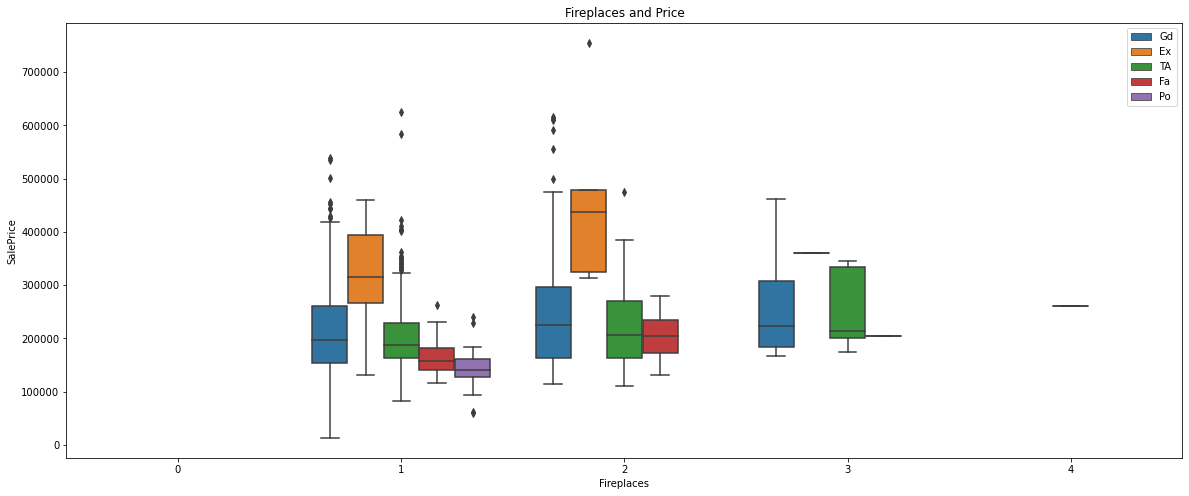

In [48]:
# Fireplaces vs. Price
plt.figure(figsize=(20,8))
plt.title('Fireplaces and Price')
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = housing3, hue = 'FireplaceQu').legend(loc='upper right')

- Fireplaces and quality has price difference for excellent condition?

No handles with labels found to put in legend.


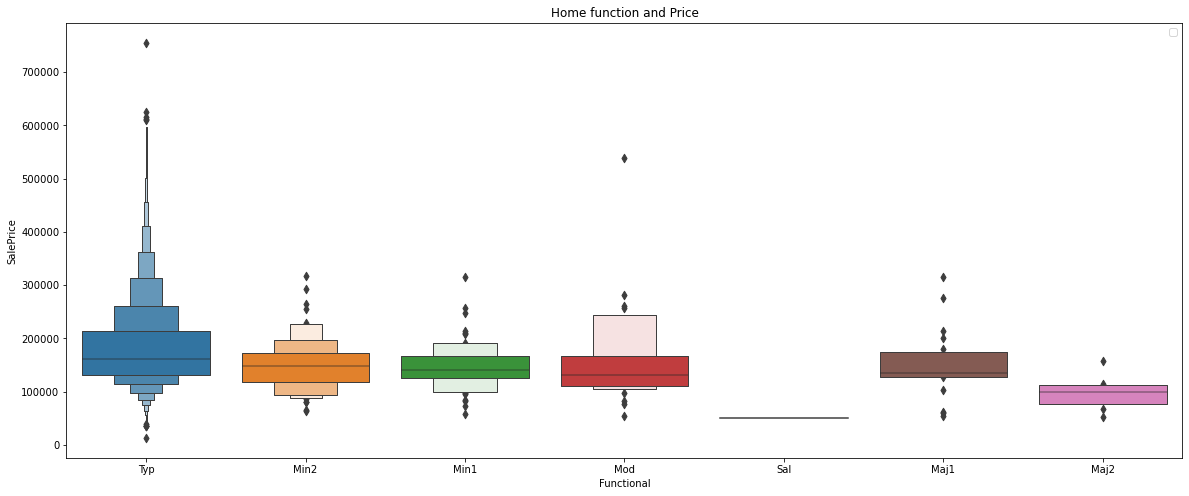

In [49]:
# Home Function vs. Price (what class should use hue=?)
plt.figure(figsize=(20,8))
plt.title('Home function and Price')
sns.boxenplot(x = 'Functional', y = 'SalePrice', data = housing3).legend(loc='upper right')

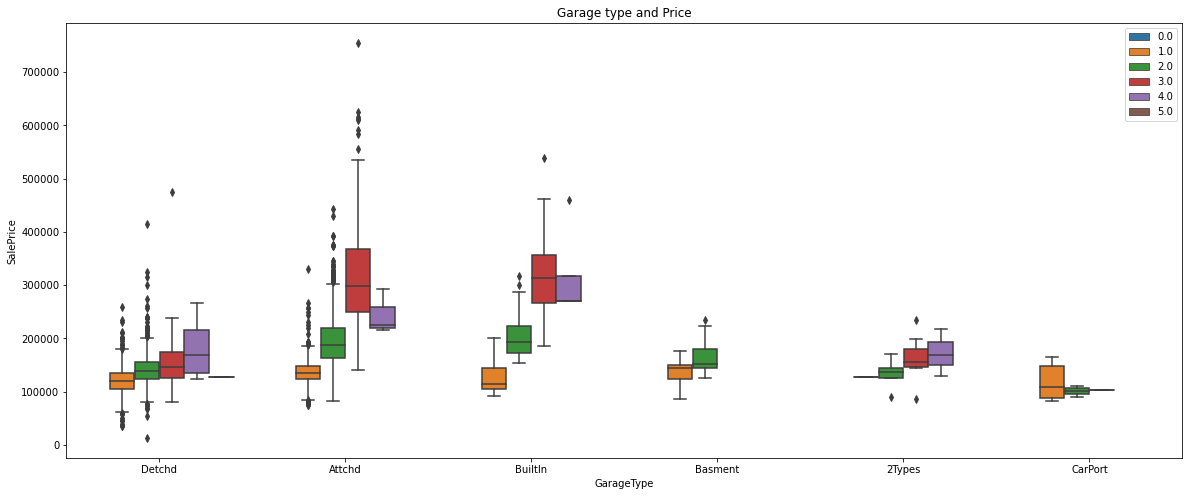

In [50]:
# Garage Type vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage type and Price')
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing3, hue = 'GarageCars').legend(loc='upper right')

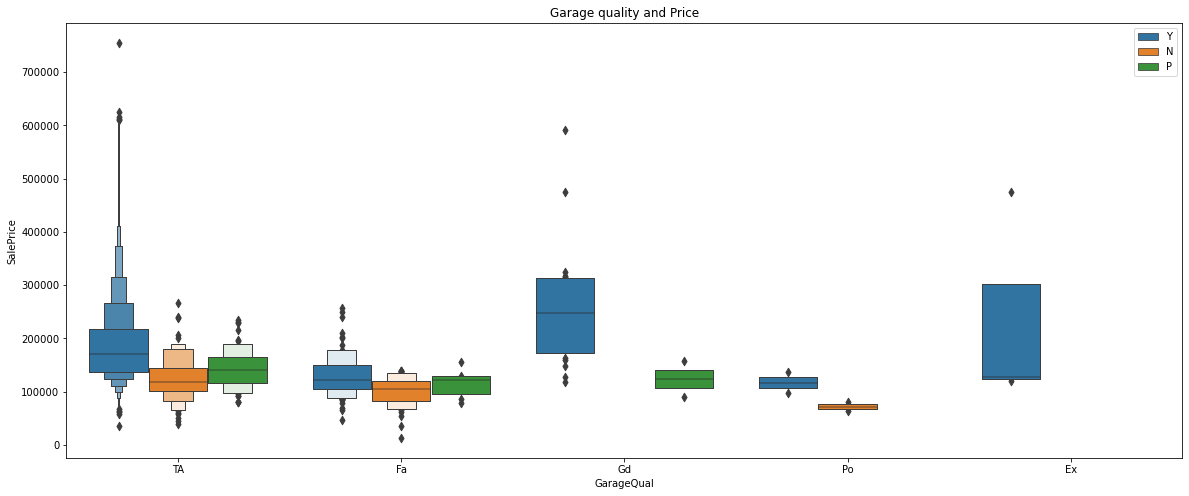

In [80]:
# Garage Condition + Paved Drive vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage quality and Price')
sns.boxenplot(x = 'GarageQual', y = 'SalePrice', data = housing3, hue = 'PavedDrive').legend(loc='upper right')

- Garage with good and excellent quality, they do have paved drive way and higher house price
- Paved drive way has higher house price compare to no paved for the same garage quality

<AxesSubplot:title={'center':'Garage Year Built and Price'}, xlabel='GarageYrBlt', ylabel='SalePrice'>

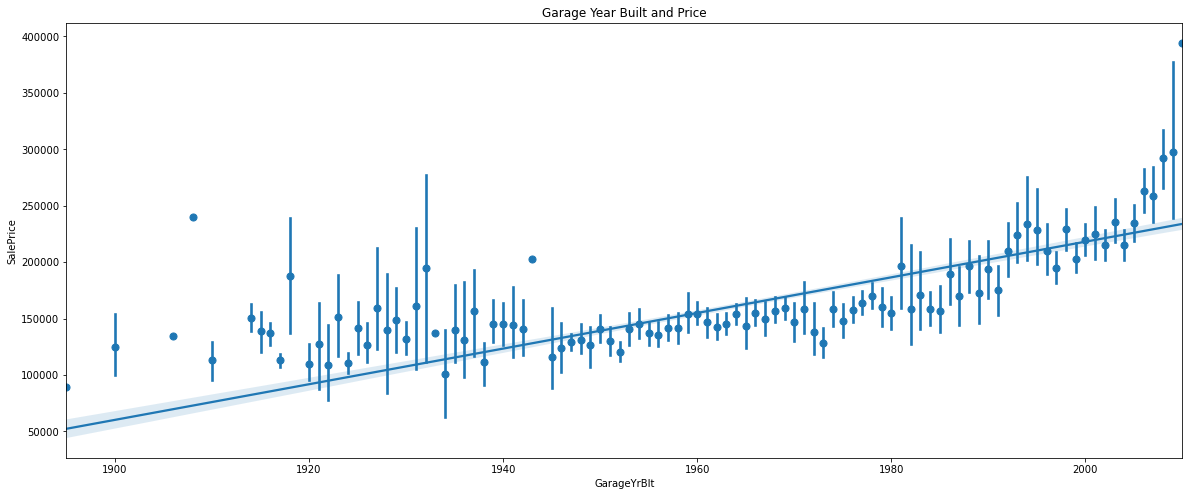

In [79]:
# Garage Year Built vs. Price
plt.figure(figsize=(20,8))
plt.title('Garage Year Built and Price')
sns.regplot(x = 'GarageYrBlt', y = 'SalePrice', data = housing3, x_estimator=np.mean)

- House price increase as more recent garage built